<a href="https://colab.research.google.com/github/mfletcher2021/blogcode/blob/main/NBA_25_26_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

Importing the dataset into Python

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NBA analysis 2025-26.xlsx to NBA analysis 2025-26.xlsx


In [ ]:
import io

NBA = pd.read_excel(io.BytesIO(uploaded['NBA analysis 2025-26.xlsx']))

Reading the dataset

In [ ]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  300 non-null    object 
 1   Team    300 non-null    object 
 2   W       300 non-null    int64  
 3   L       300 non-null    int64  
 4   Finish  300 non-null    int64  
 5   Age     300 non-null    float64
 6   Ht.     300 non-null    object 
 7   Wt.     300 non-null    int64  
 8   G       300 non-null    int64  
 9   MP      300 non-null    int64  
 10  FG      300 non-null    int64  
 11  FGA     300 non-null    int64  
 12  FG%     300 non-null    float64
 13  3P      300 non-null    int64  
 14  3PA     300 non-null    int64  
 15  3P%     300 non-null    float64
 16  2P      300 non-null    int64  
 17  2PA     300 non-null    int64  
 18  2P%     300 non-null    float64
 19  FT      300 non-null    int64  
 20  FTA     300 non-null    int64  
 21  FT%     300 non-null    float64
 22  OR

In [ ]:
NBA.head()

,Season,Team,W,L,Finish,Age,Ht.,Wt.,G,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,Atlanta Hawks,40,42,9,24.9,6'6,209,82,19780,...,0.775,974,2675,3649,2426,798,419,1273,1564,9691
1,2023-24,Atlanta Hawks,36,46,10,26.2,6'6,211,82,19855,...,0.797,1024,2639,3663,2180,615,369,1110,1522,9703
2,2022-23,Atlanta Hawks,41,41,7,24.9,6'6,210,82,19855,...,0.818,920,2719,3639,2049,580,401,1060,1541,9711
3,2021-22,Atlanta Hawks,43,39,8,26.1,6'6,211,82,19705,...,0.812,823,2783,3606,2017,587,348,972,1534,9343
4,2020-21,Atlanta Hawks,41,31,5,25.4,6'6,212,72,17405,...,0.812,760,2525,3285,1737,503,342,953,1392,8186


Performing the train, test, split-linear regression style

In [ ]:
X = NBA[['FG%', '3P%', '2P%', 'Finish', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]
y = NBA['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Making the model

In [ ]:
NBAMODEL = LinearRegression()
NBAMODEL.fit(X_train, y_train)

LinearRegression()

In [ ]:
yPredictions = NBAMODEL.predict(X_test)

yPredictions

array([43.2515066 , 36.4291265 , 55.14626364, 46.01164579, 24.18679591,
       35.59131124, 35.59836527, 49.98114132, 48.57869061, 50.65733101,
       21.296126  , 49.94020238, 31.98306604, 41.89217714, 45.65373458,
       50.57831266, 32.76923727, 45.6898562 , 20.4393901 , 55.28944034,
       52.79027154, 21.81113366, 50.79142468, 50.95798684, 53.23802534,
       50.00199063, 48.4639119 , 49.1671417 , 51.12760913, 31.20606334,
       45.3090483 , 25.02488097, 43.67955061, 48.47484838, 33.74041157,
       41.7463038 , 36.10796911, 40.5399278 , 35.30656175, 16.92677689,
       49.77947698, 39.2160337 , 22.08871355, 31.83549487, 15.2675987 ,
       18.24486804, 21.71657476, 42.21505537, 22.84745758, 25.56862333,
       43.6212702 , 20.28339646, 44.60289296, 49.20316062, 53.69182149,
       29.48304908, 44.60789347, 42.44466633, 55.93637972, 54.89728291])

Finding the coefficients and intercepts of the regression model equation

In [ ]:
NBAMODEL.coef_

array([ 6.48260593e+01,  1.13945178e+02,  1.54195451e+01, -1.94822281e+00,
        1.10428617e-02, -3.46015457e-03,  2.15326621e-02,  6.63810730e-03,
       -9.70593407e-03])

In [ ]:
NBAMODEL.intercept_

np.float64(-60.37720744829896)

Evaluating model's accuracy

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,yPredictions)

0.09573425883736708

Viewing results of predictions on a scatterplot

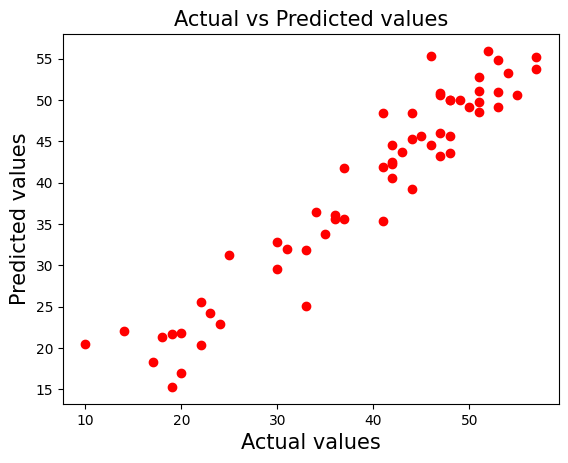

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, yPredictions, color="red")
plt.xlabel('Actual values', size=15)
plt.ylabel('Predicted values', size=15)
plt.title('Actual vs Predicted values', size=15)
plt.show()